# WPA #2 - Chapter 7

Open a new R script in R and **save it as** `wpa_2_LastFirst.R` (where Last and First is your last and first name). 

Careful about capitalizing, and using `_` and **not**, e.g., `WPA-1-LastFirst.R`

At the top of your script, write the following (**with appropriate changes**):

In [1]:
# Assignment: WPA 2
# Name: Your_name Your_surname
# Date: 5 March 2019

## Analyzing Bar survey data

<img src="http://mainetoday.com/wp-content/uploads/2014/06/meet-at-bar-red-lipstick-project.jpg" width="400" />

The following contain (fictional!) data from a survey of 200 people at one of two bars in Basel (Grenzwert and Paddy's) last Friday night at 3:00am. Each person was asked which kind of cologne they were wearing. After answering this question, a (very busy) researcher recorded how long each person spent talking to people at the bar. The data are stored in the following 5 vector objects:

- `id`: An id indicating the participant in the form `x.n`, where `x` is the name of the bar the participant was at, and `n` is a random indexing number)
- `sex`: The person's sex: `male` or `female`
- `cologne`: Which cologne did the person wear? `gio` or `calvinklein`
- `bar`: Where the person went out: `grenzwert` or `paddys`
- `time`: The amount of time the person spent talking to people in minutes

Thankfully, you don't need to type in the data yourself! The objects are stored in an *RData* file online.

Load the vectors into your R session by running the following code.

In [2]:
load(file = url("https://www.dropbox.com/s/hxdb05i2g8y50ul/wpa2.RData?dl=1"))

YOUR TURN (task A):

The `str()` function will give you basic information about objects. Get to know the objects (`id`, `sex`, `cologne`, `bar`, `time`) by running the `str()` function on each of the 5 vectors. 

### Review

YOUR TURN (task B):

1. How many people were there of each sex? (Hint: use `table()`)

2. What was the mean time?

3. What was the standard deviation of times?

4. Create `time.z` a z-score transformation of time. (Hint: z-score is defined as `(x - mean(x)) / sd(x)`)

In [3]:
table(sex)

sex
  f   m 
100 100 

In [4]:
mean(time)

[1] 165.055

In [5]:
sd(time)

[1] 45.79221

In [6]:
time.z <- (time - mean(time)) / sd(time)

### Numerical Indexing

In [7]:
###   Example:
###   Index the 2nd element of vector a.
a<-c(3, 5, 2, 1)
a[2]

[1] 5

YOUR TURN (task C):


5. What was the value of the first time?

6. What were the sexes of the first five participants?

7. What were the colognes of the 10th through the 20th participants

8. Which bar did the last participant go to? (hint: don't write the indexing number directly; instead, index the vector using the `length()` function with the appropriate argument)

In [8]:
time[1]

[1] 289

In [9]:
sex[1:5]

[1] "f" "f" "f" "m" "f"

In [10]:
cologne[10:20]

[1] "gio"         "calvinklein" "gio"         "calvinklein" "calvinklein"
 [6] "calvinklein" "gio"         "gio"         "gio"         "calvinklein"
[11] "gio"

In [11]:
bar[length(bar)]

#Alternatively:
tail(bar, n=1)
rev(bar)[1]

[1] "paddys"

[1] "paddys"

[1] "paddys"

### Logical Indexing on one variable

In [12]:
###   Example:
###   Find which elements of vector a have values less than 3
a<3

###   return only the values in a which are less than 3
a[a<3]

[1] FALSE FALSE  TRUE  TRUE

[1] 2 1

YOUR TURN (task D):

9. a) How many people wore gio? b) How many wore calvinklein?

10. a) How many people went to Grenzwert? b) How many went to Paddys?

11. What percent of people went to Grenzert? (Hint: use `mean()` combined with a logical vector)

12. How many talking times were longer than 30 minutes?

13. What percent of talking times were longer than an hour?

14. What percent of talking times were longer than 20 minutes but less than 40 minutes?

15. Create a new vector `time.60` which contains only talking times that were less than an hour?

In [13]:
sum(cologne == "gio")
sum(cologne == "calvinklein")

#some common mistakes
#sum[cologne=="gio"]     wrong brackets
#sum(cologne="gio")      single = instead of double
#sum(cologne==gio)        no quotations

#alternatively
length(cologne[cologne == "gio"])
length(cologne[cologne == "calvinklein"])

[1] 100

[1] 100

[1] 100

[1] 100

In [14]:
sum(bar == "grenzwert")
sum(bar == "paddys")

[1] 100

[1] 100

In [15]:
mean(bar == "grenzwert")

#OR
length(bar[bar == "grenzwert"])/length(bar)

[1] 0.5

[1] 0.5

In [16]:
sum(time > 30)

[1] 199

In [17]:
mean(time > 60)

[1] 0.95

In [18]:
mean(time > 20 & time < 40)

[1] 0.03

In [19]:
time.60<- time[time < 60]
time.60

[1] 37 41 33 32 24 32 45 54 31 51

### Logical indexing and two variables

YOUR TURN (task E):

16. What were the ids of people who went to grenzwert?

17. What was the mean time of people who went to Grenzwert?

18. What was the mean time of people who went to Paddys?

19. What was the mean time of people who wore gio?

20. What was the mean time of people who wore calvinklein?

21. Based on what you've learned, if someone wants to talk as long as possible, what cologne should they wear?

In [20]:
mean(time[bar == "grenzwert"])

[1] 134.31

In [21]:
mean(time[bar == "paddys"])

[1] 195.8

In [22]:
mean(time[cologne == "gio"])

[1] 159.98

In [23]:
mean(time[cologne == "calvinklein"])

[1] 170.13

In [24]:
# On average they should wear calvinklein! 
#This question is a bit ambiguous, you could also argue that the maximum time is the correct way to answer it:
max(time[cologne=="gio"])
max(time[cologne=="calvinklein"])
#In this case you would respond "gio".

[1] 304

[1] 207

### Changing data in a vector with indexing

In the next questions, we'll use indexing and assignment to change the values within a vector. Because we don't want to change the original data, we'll make all of our adjustments on new vectors.

YOUR TURN  (task F):

22. Create new objects `bar.r`, `cologne.r` and `time.r` that are copies of the original `bar`, `cologne` and `time` objects (Hint: Just assign the existing vectors to new objects)

23. a) In the `bar.r` vector, change the `"grenzwert"` values to `"g"`. b) Now change the `"paddys"` values to `"p"`

24. a) In the `cologne.r` vector, change the `"gio"` values to `"G"`. b) Now change the `"calvinklein"` values to `"C"`

25. In the `time.r` vector, change all time values greater than 280 to 280. Confirm that you did it correctly by calculating the maximum time in `time.r`

In [25]:
bar.r <- bar
cologne.r <- cologne
time.r <- time

In [26]:
bar.r[bar == "grenzwert"] <- "g"
bar.r[bar == "paddys"] <- "p"

#Remember that R will replicate the value being assigned to fit all available slots in the vector.
#We could do this explicitly ourself by instead using:
bar.r[bar=="grenzwert"]<- rep("g", sum(bar=="grenzwert") )
bar.r[bar=="paddys"]<- rep("p", sum(bar=="paddys") )

#Alternatively:
bar.r <- factor(bar, levels= c("grenzwert", "paddys"), labels= c("g", "p"))

In [27]:
cologne.r[cologne == "gio"] <- "G"
cologne.r[cologne == "calvinklein"] <- "C"

#Alternatively:
cologne.r <- factor(cologne, levels= c("gio", "calvinklein"), labels= c("G", "C"))

In [28]:
time.r[time > 280] <- 280
max(time.r)

[1] 280

### Solving a paradox...

<img src="http://home.adelphi.edu/~stemkoski/mathematrix/e-waterfall.jpg" width="200" />

YOUR TURN  (task G):

26. Based on what you've learned so far, if someone wanted to talk to people as long as possible, what cologne should they wear?

In [29]:
#I already said calvinklein...why are you asking me again?

*Let's see if your prediction holds up!*

YOUR TURN  (task H):

27. What was the mean time of people who went to Grenzwert and wore gio??

28. What was the mean time of people who went to Grenzwert and wore calvinklein?

29. What was the mean time of people who went to Paddys who wore gio?

30. What was the mean time of people who went to Paddys who wore calvinklein??

31. Based on what you've learned now, if someone's goal is to talk to people as long as possible, what cologne should they wear?

In [30]:
mean(time[bar == "grenzwert" & cologne == "gio"])

[1] 145.0111

In [31]:
mean(time[bar == "grenzwert" & cologne == "calvinklein"])

[1] 38

In [32]:
mean(time[bar == "paddys" & cologne == "gio"])

[1] 294.7

In [33]:
mean(time[bar == "paddys" & cologne == "calvinklein"])

[1] 184.8111

In [34]:
# They should wear gio! Talking times are longer for gio in BOTH bars!
# Even though across bars talking times are longer for calvinklein. Crazy!

#### You can visualize the data using the following code

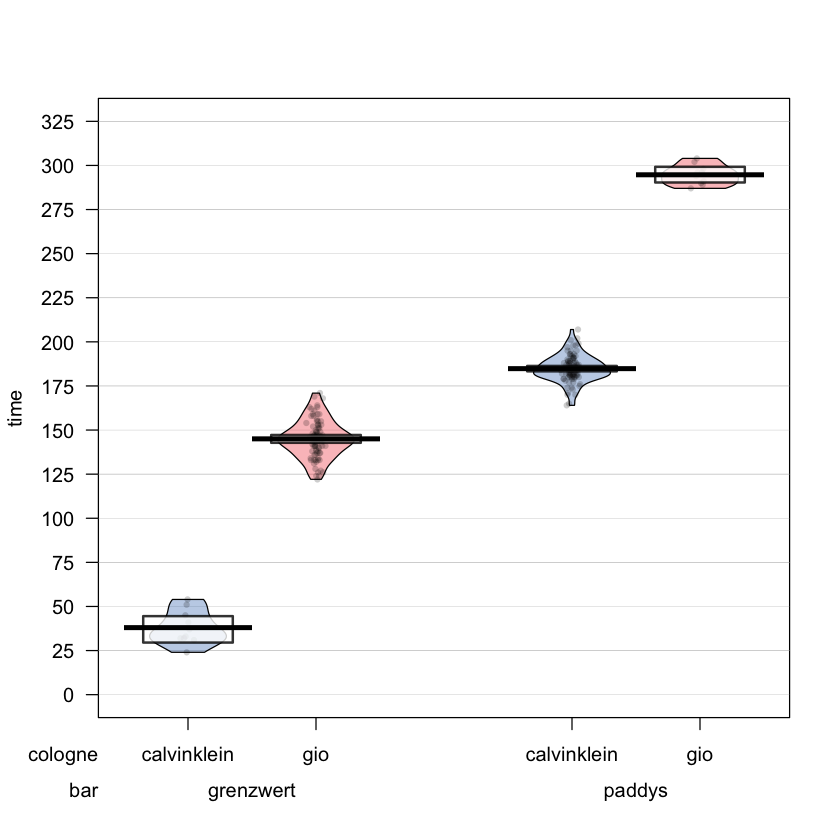

In [35]:
# Combine vectors in a dataframe
survey.df <- data.frame(bar, cologne, time)
# Create a pirateplot of the data
yarrr:::pirateplot(time ~ cologne + bar, data = survey.df)

What you've just seen is an example of **Simpson's Paradox**. If you want to learn more, check out [the wikipedia page](https://en.wikipedia.org/wiki/Simpson%27s_paradox).

In [36]:
# Yes I definitely looked at the Wikipedia page. Very interesting!

In [37]:
table(survey.df$cologne, survey.df$bar)

             
              grenzwert paddys
  calvinklein        10     90
  gio                90     10

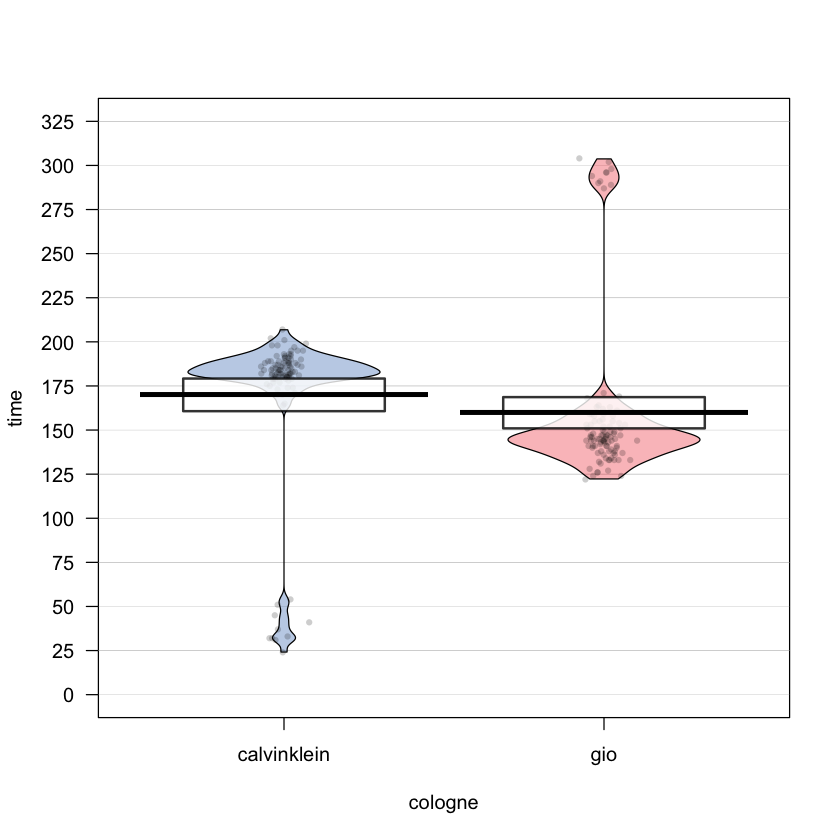

In [38]:
# Create a pirateplot of the data
yarrr:::pirateplot(time ~ cologne, data = survey.df)

### Let's wrap this up!

YOUR TURN (task I):

32. What percent of women wore calvinklein?

33. What was the median time of people who went to grenzwert and wore gio but who talked more than 100 minutes?

34. What percent of participants *either* went to grenzwert and talked for less than 220 minutes *or* went to paddys and talked for more than 150 minutes but no longer than 250 minutes?

35. Let's make the calvinklein wearers look better. For all of the calvinklein wearers, add a random sample from a normal distribution with mean 30 and standard deviation 5 to their original talking times.


In [39]:
# Create a vector cologne.w with the colognes of women only
cologne.w <- cologne[sex == "f"]

# What percent wore calvinklein?
mean(cologne.w == "calvinklein")

# OR, do it all at once
mean(cologne[sex == "f"] == "calvinklein")

# to instead get the percent of calvin kelin wearers who are women use:
mean(sex[cologne=="calvinklein"]== "f")
# these are equivalent by chance.

[1] 0.51

[1] 0.51

[1] 0.51

In [40]:
median(time[bar == "grenzwert" & cologne == "gio" & time > 100])

[1] 144.5

In [41]:
mean((bar == "grenzwert" & time < 220) | (bar == "paddys" & time > 150 & time < 250))

[1] 0.95

In [42]:
# Step 1: Create a logical vector of who wore calvinklein
ck.log <- cologne == "calvinklein"
# Alternatively you could create a numeric vector of Indexes. Run with both and compare
ck.num <- which(cologne == "calvinklein")

# Step 2: Do assignment!
time[ck.log] <- time[ck.log] + rnorm(n = sum(ck.log), mean = 30, sd = 5)


## OR do it all at once
time[cologne == "calvinklein"] <- time[cologne == "calvinklein"] + rnorm(n = sum(cologne == "calvinklein"), mean = 30, sd = 5)

### That's it! Now it's time to submit your assignment!

Save and email your `wpa_2_LastFirst.R` file to me at [laura.fontanesi@unibas.ch](mailto:laura.fontanesi@unibas.ch). 